**1. Import Required Libraries**

In [2]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

* easyocr: For optical character recognition (OCR), extracting text from images.
* cv2 (OpenCV): For image processing tasks like reading, manipulating, and displaying images.
* matplotlib.pyplot: For displaying images.
* numpy: For numerical operations, though not directly used in this particular code.

**2. Load Image and Initialize OCR Reader**

In [23]:
IMAGE_PATH = r'dataset1/dataset1/train/images/0_25_hr_png_jpg.rf.34866be51aa07cf1e1b0755a41534710.jpg'

* The image path is specified using a raw string (r), ensuring that backslashes don't get interpreted as escape characters.
* An easyocr.Reader object is created, initialized with the language 'en' for English text recognition.

**3. Perform OCR on Image**

In [24]:
reader = easyocr.Reader(['en'])
result = reader.readtext(IMAGE_PATH)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[54, 178], [200, 178], [200, 282], [54, 282]], 'HLF', 0.9990568747422591),
 ([[228, 180], [374, 180], [374, 282], [228, 282]], '129', 0.999991534466405)]

* The readtext function performs OCR on the image specified by IMAGE_PATH. It returns a list of detected text blocks with their bounding box coordinates and the text content.

**4. Interpretation of OCR Results**

In [25]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

* The OCR output is a list where each element contains:
1. A list of 4 points representing the bounding box of the detected text.
2. The recognized text (e.g., 'HLF', '129').
3. The confidence score (e.g., 0.9990568747422591).

**5. Draw Bounding Box and Text on the Image**

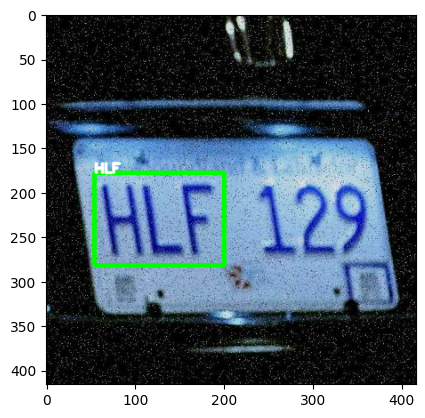

In [26]:
img = cv2.imread(IMAGE_PATH)
img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
img = cv2.putText(img,text,top_left, font, 0.5,(255,255,255),2,cv2.LINE_AA)
plt.imshow(img)
plt.show()

* The coordinates for the top-left and bottom-right corners of the first bounding box are extracted.
* cv2.rectangle is used to draw a green rectangle around the detected text on the image.
* cv2.putText adds the recognized text ('HLF') near the bounding box using white text color.

**6. Display the Annotated Image**



* The image with bounding boxes and annotated text is displayed using matplotlib.

**7. Process and Annotate Multiple Texts**

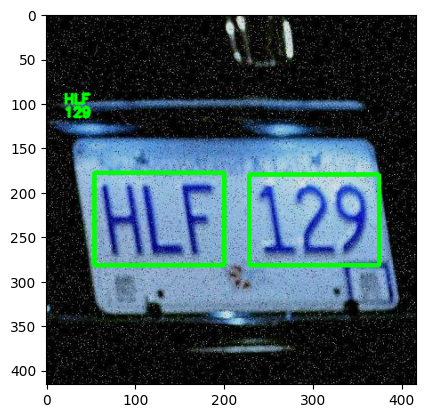

In [27]:
img = cv2.imread(IMAGE_PATH)
spacer = 100
for detection in result: 
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
    img = cv2.putText(img,text,(20,spacer), font, 0.5,(0,255,0),2,cv2.LINE_AA)
    spacer+=15
    
plt.imshow(img)
plt.show()

* For every detected text block in the result, the bounding box is drawn and the text is annotated.
* A spacer value is used to position the text vertically without overlap.
* The text is drawn in green and displayed at an incremented position on the image.

**8. Display the Final Annotated Image**

* The final image with all the detected texts and bounding boxes is displayed.


**Conclusion:**  

This code demonstrates the integration of EasyOCR and OpenCV for text detection and annotation in images. By extracting text from images and visualizing it with bounding boxes, it provides a clear and intuitive way to display OCR results. The approach is effective for extracting and marking detected text, making it useful in applications like document scanning, automated text recognition, or license plate recognition. The process also showcases the capability of Python libraries to process and manipulate images while providing valuable feedback for text analysis.